In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scipy
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [116]:
blood = pd.read_csv('./blood_pressure.csv')
blood['diet'] = blood['diet'].replace({'0': 'no'})
blood = blood[blood['height'] != 0]
blood = blood[blood['blood_pressure'] != 0]
blood['age_height'] = np.log((blood['age']*blood['height']))
blood['food_agregate'] = (blood['water']*blood['carbs']*blood['fiber']*blood['protien']*blood['sugar'])
blood['drugs'] = (blood['marijuana_use']*blood['cocaine_uses'])
blood['substances'] = (blood['fats']*blood['cholesterol']*blood['alchohol']*blood['caffeine'])
blood[:10].T
blood[:10].T

,0,1,2,3,4,5,6,7,8,9
SEQN,93711.0,93716.0,93717.0,93721.0,93723.0,93726.0,93728.0,93738.0,93743.0,93746.0
blood_pressure,68.0,72.0,62.0,68.0,72.0,52.0,74.0,82.0,86.0,64.0
systolic_blood_pressure,108.0,120.0,116.0,132.0,124.0,140.0,122.0,120.0,152.0,106.0
weight,62.1,77.7,74.4,85.1,64.9,74.3,118.1,97.7,79.3,62.1
height,170.6,159.2,174.1,154.0,170.1,154.5,188.1,170.2,187.8,158.4
bmi,21.3,30.7,24.5,35.9,22.4,31.1,33.4,33.7,22.5,24.8
salt_type,ordinary,ordinary,ordinary,no_extra_salt,ordinary,ordinary,ordinary,salt_substitute,ordinary,ordinary
diet,yes,no,no,no,no,no,no,yes,no,no
protien,101.33,103.91,97.12,79.98,41.62,81.89,80.0,116.36,175.55,80.67
carbs,339.6,442.98,345.52,226.61,269.6,184.99,213.19,50.95,684.76,222.26


In [117]:
m1 = smf.ols('blood_pressure ~ age + height + bmi + alchohol + marijuana_use + min_vig_rec + C(race) + C(gender)', blood).fit()
bp_test2 = het_breuschpagan(m1.resid, m1.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m1.summary()

{'LM Statistic': 39.6996489196044, 'LM-Test p-value': 4.026244208588668e-05}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         blood_pressure   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     31.38
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.98e-63
Time:                        12:45:50   Log-Likelihood:                -10105.
No. Observations:                2642   AIC:                         2.023e+04
Df Residuals:                    2630   BIC:                         2.030e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      33.8724      5.515      6.142      0.000      23.058      44.687
C(race)[T.mexican_american]    -0.5844      0.760     -0.769      0.442      -2.074       0.905
C(race)[T.multi_racial]         1.3076      0.703      1.861      0.063      -0.070       2.685
C(race)[T.other_hispanic]      -0.9789      0.870     -1.125      0.261      -2.685       0.728
C(race)[T.white]               -0.8670      0.603     -1.437      0.151      -2.050       0.316
C(gender)[T.male]               1.6230      0.621      2.614      0.009       0.406       2.840
age                             0.1954      0.015     12.751      0.000       0.165       0.225
height                          0.1478      0.033      4.511      0.000       0.084       0.212
bmi                             0.1833      0.030      6.012      0.000       0.124       0.243
alchohol                        0.0072      0.008      0.863      0.388      -0.009       0.023
marijuana_use                   0.0382      0.145      0.263      0.792      -0.246       0.323
min_vig_rec                    -0.0067      0.005     -1.291      0.197      -0.017       0.003
==============================================================================
Omnibus:                       42.335   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.279
Skew:                           0.117   Prob(JB):                     3.33e-16
Kurtosis:                       3.770   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
m2 = smf.ols('np.log(blood_pressure) ~ age_height + cocaine_uses + C(gender) + C(race)', blood).fit()
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m2.summary()

{'LM Statistic': 1.1874012496063806, 'LM-Test p-value': 0.9912140937449515}


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(blood_pressure)   R-squared:                       0.126
Model:                                OLS   Adj. R-squared:                  0.124
Method:                     Least Squares   F-statistic:                     54.28
Date:                    Mon, 09 Oct 2023   Prob (F-statistic):           9.30e-73
Time:                            12:47:12   Log-Likelihood:                 1184.1
No. Observations:                    2642   AIC:                            -2352.
Df Residuals:                        2634   BIC:                            -2305.
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1040      0.069     44.850      0.000       2.968       3.240
C(gender)[T.male]               0.0355      0.006      5.807      0.000       0.024       0.047
C(race)[T.mexican_american]    -0.0147      0.010     -1.437      0.151      -0.035       0.005
C(race)[T.multi_racial]         0.0037      0.009      0.394      0.694      -0.015       0.022
C(race)[T.other_hispanic]      -0.0235      0.012     -1.989      0.047      -0.047      -0.000
C(race)[T.white]               -0.0140      0.008     -1.671      0.095      -0.030       0.002
age_height                      0.1317      0.008     16.955      0.000       0.117       0.147
cocaine_uses                    0.0078      0.003      3.107      0.002       0.003       0.013
==============================================================================
Omnibus:                      171.782   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.100
Skew:                          -0.508   Prob(JB):                     1.50e-61
Kurtosis:                       4.229   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
sm.stats.anova_lm(m2, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),0.807946,1.0,33.715613,7.143634e-09
C(race),0.217358,4.0,2.267585,5.966119e-02
age_height,6.889234,1.0,287.488092,2.779264e-61
cocaine_uses,0.231332,1.0,9.653499,1.910057e-03
Residual,63.119981,2634.0,NaN,NaN


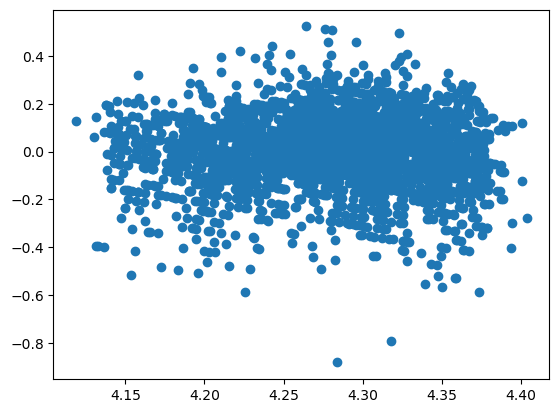

In [123]:
resid = m2.resid
values = m2.fittedvalues
plt.scatter(values, resid)

In [124]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))

{'LM Statistic': 1.1874012496063806, 'LM-Test p-value': 0.9912140937449515}


In [125]:
plt.scatter(blood['age_height_bmi'], np.log(blood['blood_pressure']))

KeyError: 'age_height_bmi'